# Test de l'opérateur ProblemDiscontinuSepIntT

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), '..'))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path

In [2]:
from src.main_discontinu import *
from src.plot_fields import *

%matplotlib notebook
rc('figure', figsize=(10,5))
rc('figure', dpi=100)

In [3]:
n_lim = 10**8
t_fin_lim = 1.

In [4]:
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
phy_prop_ref = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                                  lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                                  alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=3.9*10**-5, schema='upwind', time_scheme='euler', phy_prop=phy_prop, cfl=0.5)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

<IPython.core.display.Javascript object>


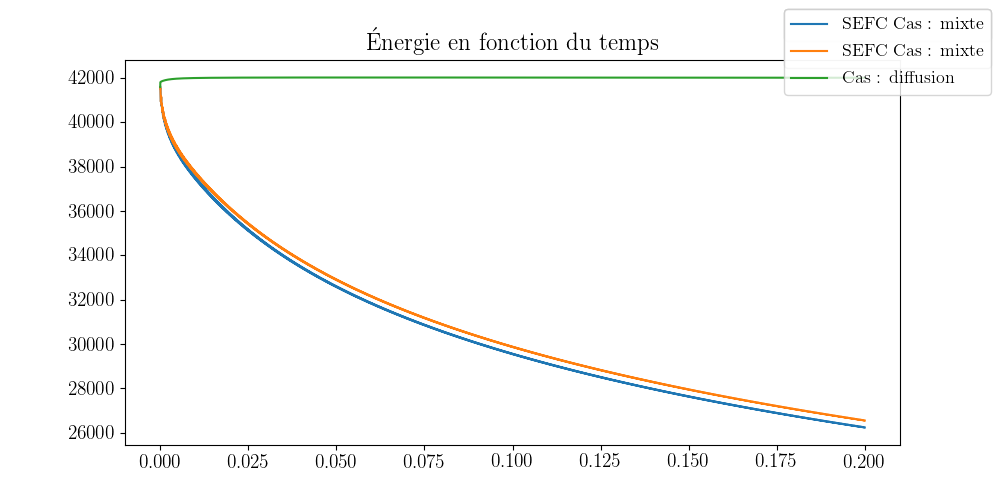

dt fourier
6.918433404737903e-06
Ti
SEFC Cas : mixte


<IPython.core.display.Javascript object>


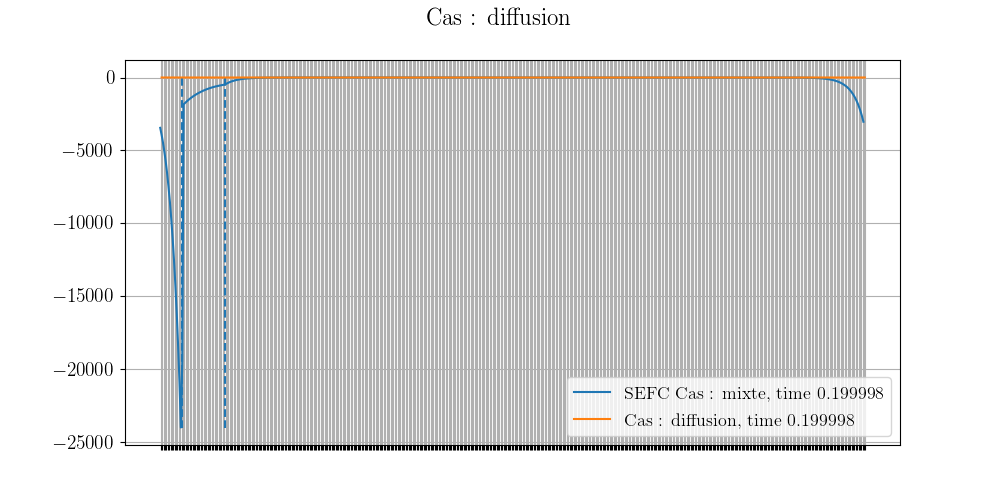

dE*/dt* = -0.083975
dt fourier
6.918433404737903e-06
Ti2
SEFC Cas : mixte


<IPython.core.display.Javascript object>


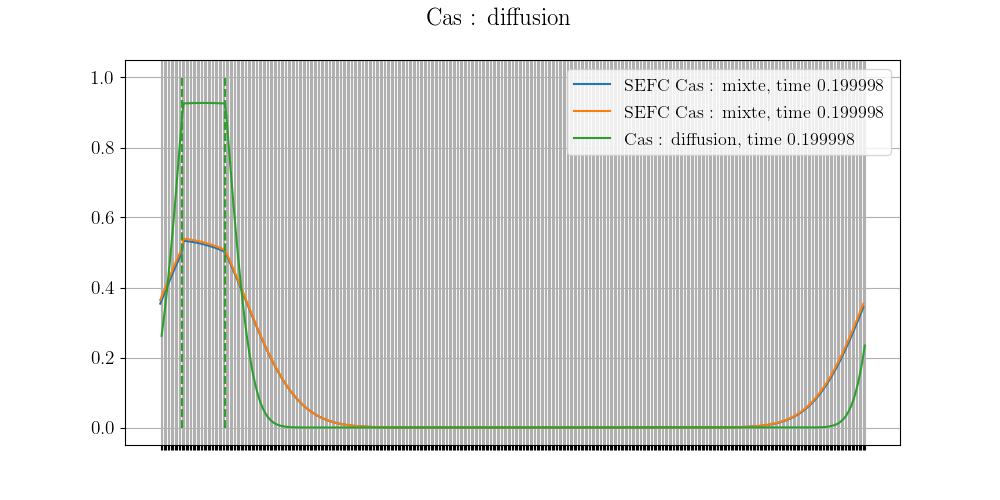

<IPython.core.display.Javascript object>


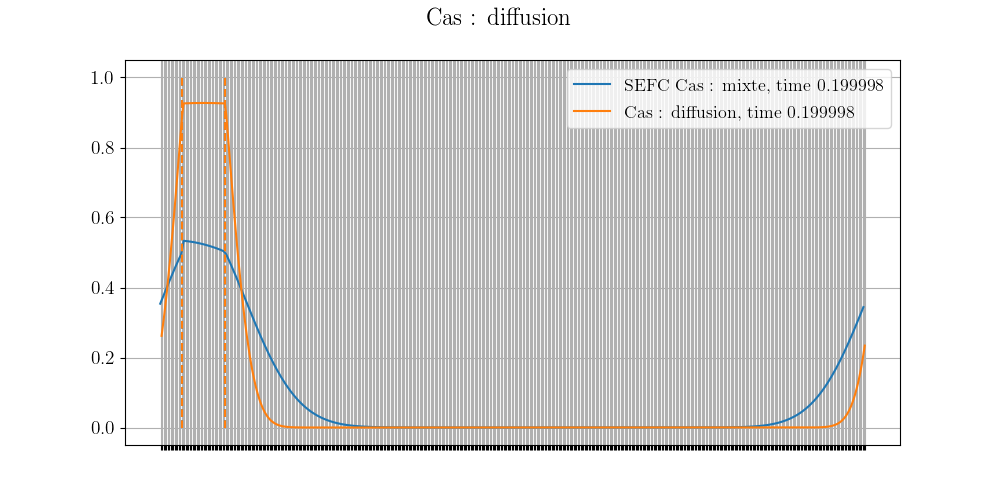

dE*/dt* = -7.50581e-06
dt fourier
6.918433404737903e-06
Ti3
SEFC Cas : mixte


<IPython.core.display.Javascript object>


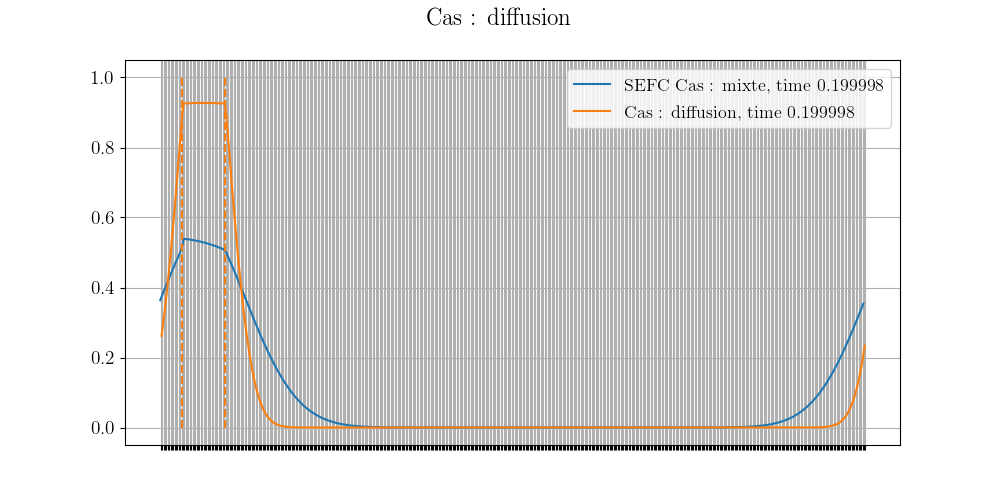

dE*/dt* = -7.50383e-06
dt fourier
6.918433404737903e-06
Cas : diffusion
dE*/dt* ref = -1.14723e-08


In [5]:
t_fin = 0.2
plot = Plotter('decale')
plot0 = Plotter('decale')
plot1 = Plotter('decale')
plot2 = Plotter('decale')
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')

prob = ProblemDiscontinuSepIntT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti')
E0 = prob.energy
print(prob.name)
print('==========================')
t, e = prob.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot0])

# is divergent
# l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
# le = fig1.legend()

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob1 = ProblemDiscontinuSepIntT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti2')
E0 = prob1.energy
print(prob1.name)
print('==========================')
t, e = prob1.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot1])

l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob1.name)
le = fig1.legend()

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob1.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob2 = ProblemDiscontinuSepIntT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti3')
E0 = prob2.energy
print(prob2.name)
print('==========================')
t, e = prob2.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2])

l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob2.name)
le = fig1.legend()

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop)
E1 = prob_ref.energy
print(prob_ref.name)
print('==========================')
t_ref, e_ref = prob_ref.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0, plot1, plot2])

l = ax1.plot(t_ref, e_ref/(0.02*0.005*0.005), label=prob_ref.name)
le = fig1.legend()

dedt_adim = (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1  # on a mult
print('dE*/dt* ref = %g' % dedt_adim)

In [6]:
phy_prop = PhysicalProperties(Delta=0.02, v=0.2, dS=0.005**2,
                              lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                              alpha=0.06, a_i=357.)
phy_prop_ref = PhysicalProperties(Delta=0.02, v=0., dS=0.005**2,
                                  lda1=5.5*10**-2, lda2=15.5, rho_cp1=70278., rho_cp2=702780., diff=1.,
                                  alpha=0.06, a_i=357.)
num_prop = NumericalProperties(dx=3.9*10**-5, schema='weno', time_scheme='euler', phy_prop=phy_prop, cfl=0.5)
markers = BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
markers.shift(0.00001)

<IPython.core.display.Javascript object>


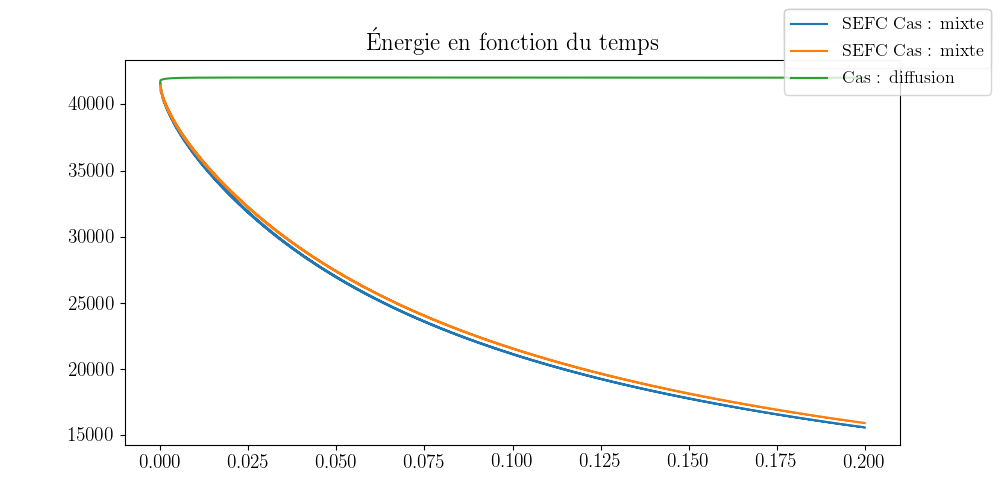

dt fourier
6.918433404737903e-06
Ti
SEFC Cas : mixte


<IPython.core.display.Javascript object>


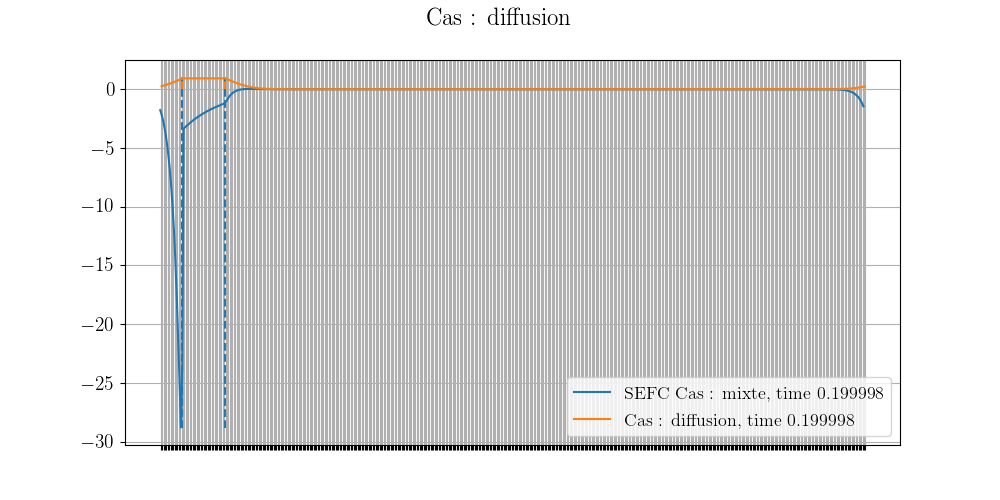

dE*/dt* = -0.000150128
dt fourier
6.918433404737903e-06
Ti2
SEFC Cas : mixte


<IPython.core.display.Javascript object>


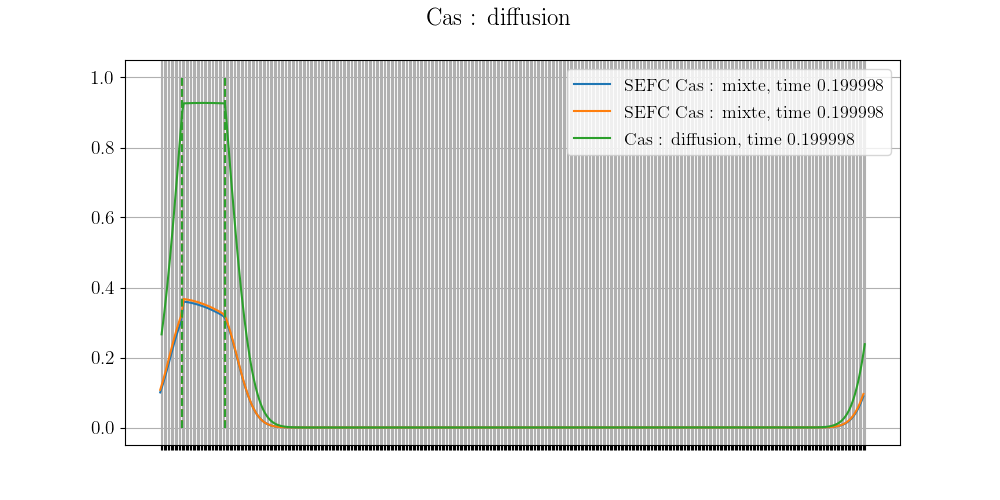

<IPython.core.display.Javascript object>


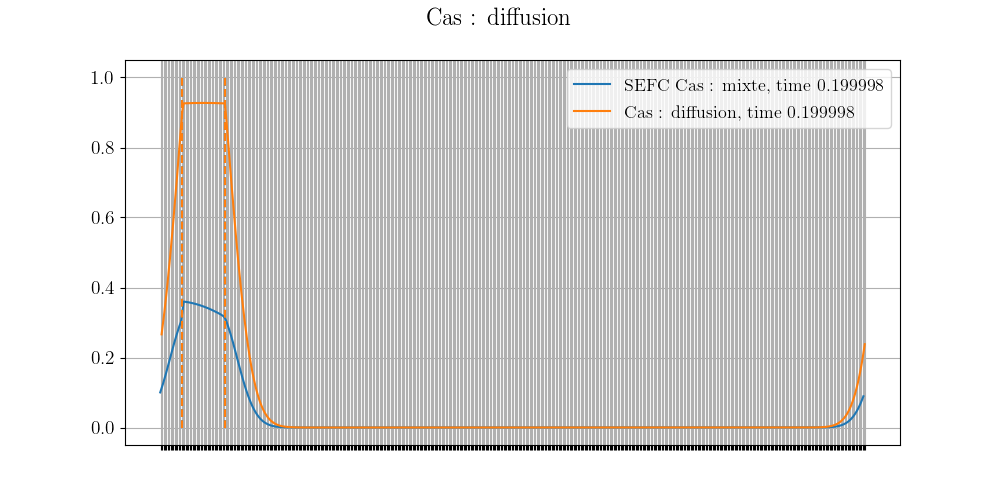

dE*/dt* = -1.35646e-05
dt fourier
6.918433404737903e-06
Ti3
SEFC Cas : mixte


<IPython.core.display.Javascript object>


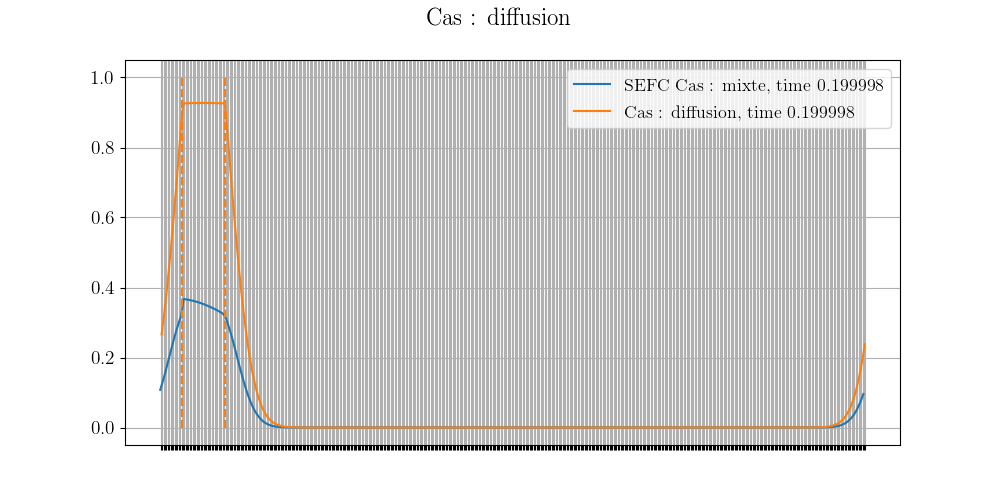

dE*/dt* = -1.3663e-05
dt fourier
6.918433404737903e-06
Cas : diffusion
dE*/dt* ref = -1.58104e-08


In [7]:
t_fin = 0.2
plot = Plotter('decale')
plot0 = Plotter('decale')
plot1 = Plotter('decale')
plot2 = Plotter('decale')
fig1,ax1 = plt.subplots(1)
ax1.set_title('Énergie en fonction du temps')

prob = ProblemDiscontinuSepIntT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti')
E0 = prob.energy
print(prob.name)
print('==========================')
t, e = prob.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot0])

# is divergent
# l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob.name)
# le = fig1.legend()

n = len(e)
i0 = int(n/5)
dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob1 = ProblemDiscontinuSepIntT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti2')
E0 = prob1.energy
print(prob1.name)
print('==========================')
t, e = prob1.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot1])

l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob1.name)
le = fig1.legend()

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob1.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob2 = ProblemDiscontinuSepIntT(get_T_creneau, markers=markers, phy_prop=phy_prop, num_prop=num_prop, interp_type='Ti3')
E0 = prob2.energy
print(prob2.name)
print('==========================')
t, e = prob2.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot2])

l = ax1.plot(t, e/(0.02*0.005*0.005), label=prob2.name)
le = fig1.legend()

dedt_adim = (e[-1] - e[i0]) / (t[-1] - t[i0]) * prob2.dt / E0  # on a mult
print('dE*/dt* = %g' % dedt_adim)

prob_ref = Problem(get_T_creneau, markers=markers, phy_prop=phy_prop_ref, num_prop=num_prop)
E1 = prob_ref.energy
print(prob_ref.name)
print('==========================')
t_ref, e_ref = prob_ref.timestep(t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=[plot, plot0, plot1, plot2])

l = ax1.plot(t_ref, e_ref/(0.02*0.005*0.005), label=prob_ref.name)
le = fig1.legend()

dedt_adim = (e_ref[-1] - e_ref[i0]) / (t_ref[-1] - t_ref[i0]) * prob_ref.dt / E1  # on a mult
print('dE*/dt* ref = %g' % dedt_adim)